In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import mpl_toolkits.mplot3d as a3
import math

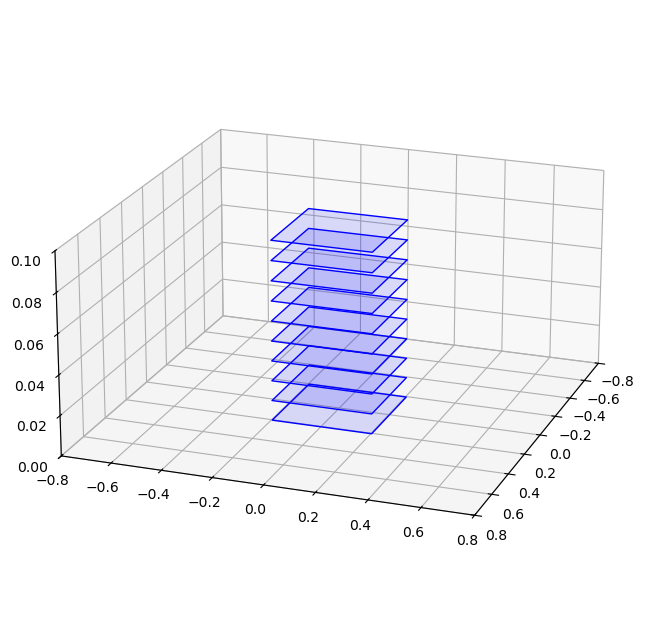

In [5]:
h = 0.01
l = 0.4
r = 10
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 20)
ax.set_box_aspect(aspect=(1, 1, 0.5))
plane_vtx = np.array([[-l/2, -l/2, 0], [l/2, -l/2, 0], [l/2, l/2, 0], [-l/2, l/2, 0]])
plane0 = a3.art3d.Poly3DCollection([plane_vtx], closed=True)
plane0.set_color('#0000ff20')
plane0.set_edgecolor('#0000ff')
ax.add_collection3d(plane0)
ax.set_xlim3d(-2*l, 2*l)
ax.set_ylim3d(-2*l, 2*l)
ax.set_zlim3d(0,r*h)
for i in range(1,r):
    plane_h = i*h
    plane1 = a3.art3d.Poly3DCollection([plane_vtx + [0, 0, plane_h]], closed=True)
    plane1.set_color('#0000ff20')
    plane1.set_edgecolor('#0000ff')
    ax.add_collection3d(plane1)
eff = []

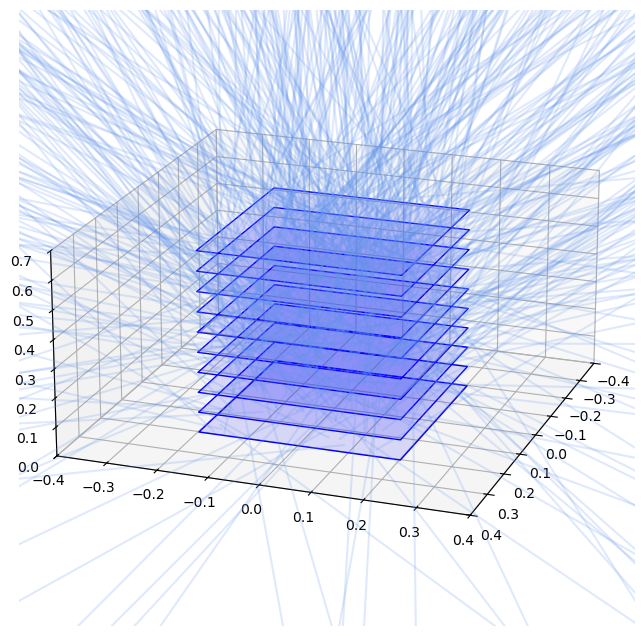

431395 535460 0.431395 0.53546


In [31]:
h = 0.07
l = 0.4
r = 10

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(20, 20)
ax.set_box_aspect(aspect=(1, 1, 0.5))

plane_vtx = np.array([[-l/2, -l/2, 0], [l/2, -l/2, 0], [l/2, l/2, 0], [-l/2, l/2, 0]])
plane0 = a3.art3d.Poly3DCollection([plane_vtx], closed=True)
plane0.set_color('#0000ff20')
plane0.set_edgecolor('#0000ff')
ax.add_collection3d(plane0)

m = 1
ax.set_xlim3d(-m*l, m*l)
ax.set_ylim3d(-m*l, m*l)
ax.set_zlim3d(0,r*h)

for i in range(1,r):
    plane_h = i*h
    plane1 = a3.art3d.Poly3DCollection([plane_vtx + [0, 0, plane_h]], closed=True)
    plane1.set_color('#0000ff20')
    plane1.set_edgecolor('#0000ff')
    ax.add_collection3d(plane1)
    
p = 0.80
N = 1000000
nmax = 50
th, ph = np.arccos((1 - np.random.uniform(size=N))**(1/3)), 2*math.pi*np.random.uniform(size=N)
st, ct, sp, cp = np.sin(th), np.cos(th), np.sin(ph), np.cos(ph)
us, vs, ws = st*cp, st*sp, ct

ths, phs, ths1, phs1 = [], [], [] ,[]

for i in range(r):
    
    ll, ul = int(i*(N/r)), int((i+1)*(N/r))
    u, v, w = us[ll:ul], vs[ll:ul], ws[ll:ul]
    
    s = int(N/r)
    xs = np.random.uniform(-l/2, l/2, size = s)
    ys = np.random.uniform(-l/2, l/2, size = s)
    zs = np.full(s, i*h)

    ax.quiver(xs[:nmax], ys[:nmax], zs[:nmax], u[:nmax], v[:nmax], w[:nmax], length=r, arrow_length_ratio=0,
            color='cornflowerblue', alpha=0.2)
    
    bol_array = np.zeros((r, len(xs)), dtype=int)
    bol_array1 = np.zeros((r, len(xs)), dtype=int)
    
    
    
    for j in range(-i,r-i):
        
        #Trovo le intersezioni con il j-esimo piano z
        x1s = xs + (j*h-zs)*(u/w)
        y1s = ys + (j*h-zs)*(v/w)
        
        #Verifico se queste intersezioni si trovano entro la geometria del j-esimo pannello (caso con efficienza p)
        bol = (-l/2 <= x1s) & (x1s <= l/2) & (-l/2 <= y1s) & (y1s <= l/2) & (np.random.uniform() <= p)
        bol_array[j+i] = bol.astype(int)
        
        #Verifico se queste intersezioni si trovano entro la geometria del j-esimo pannello (caso ideale)
        bol1 = (-l/2 <= x1s) & (x1s <= l/2) & (-l/2 <= y1s) & (y1s <= l/2)
        bol_array1[j+i] = bol1.astype(int)

    
    bol_sum = bol_array.sum(axis=0)
    c, d = (th[ll: ul])[bol_sum > 2], (ph[ll: ul])[bol_sum > 2]
    ths += list(c)
    phs += list(d)
    bol_sum1 = bol_array1.sum(axis=0)
    c1, d1 = (th[ll: ul])[bol_sum1 > 2], (ph[ll: ul])[bol_sum1 > 2]
    ths1 += list(c1)
    phs1 += list(d1)
    
    
tot = len(ths)
tot1 = len(ths1)
plt.show()
print(tot, tot1, tot/N, tot1/N)

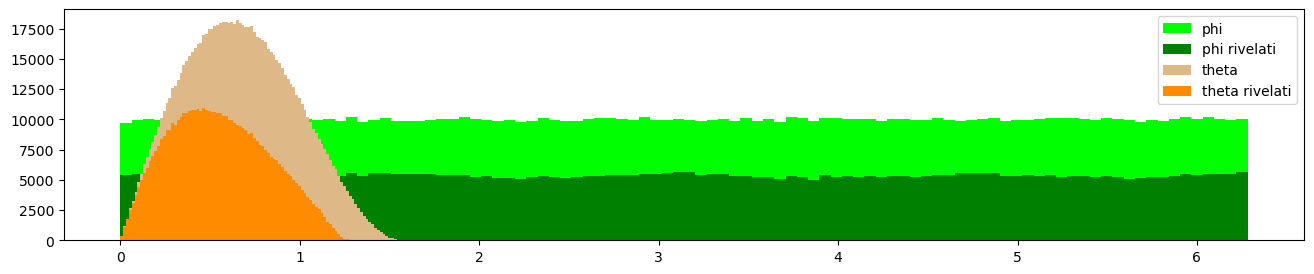

In [29]:
plt.figure(figsize=(16, 3))
theta_range=[0, math.pi/2]
phi_range=[0, 2*math.pi]
nbins = 100
b = 0
plt.hist(ph, density=b, bins=nbins, range=phi_range, color='lime', label='phi')
plt.hist(phs1, density=b, bins=nbins, range=phi_range, color='green', label='phi rivelati')
plt.hist(th, density=b, bins=nbins, range=theta_range, color='burlywood', label='theta')
plt.hist(ths1, density=b, bins=nbins, range=theta_range, color='darkorange', label='theta rivelati')
plt.legend()
plt.show()